In [1]:
# Import libraries
import numpy as np
import math
import random
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

import statsmodels.api as sm # linear regression

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import os

# Directory path
myDir = "/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/simulation_prox/new_simulation_figures/"
os.chdir(myDir)
import ProxseqClasses as PC
import calculatePredScore as PS

#*****
mpl.rcdefaults()
# Set font to be arial
mpl.rc('font', **{'sans-serif':'Arial', 'size':12})
mpl.rcParams['mathtext.rm'] = 'sans' # to have non-italic greek letter, use r'$\mathrm{\alpha}$', does NOT work with f-string
mpl.rcParams['axes.titlesize'] = 12
# Set default tick size
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['ytick.minor.size'] = 2.5
# Default legend settings
mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.edgecolor'] = 'k'
#*****
# Seed number
np.random.seed(2019)
random.seed(2019)

#%% Simulation parameters
# Define the circle diameter in nm, centered at 0
d = 10000

# PLA ligation distance in nm (two antibodies within this distance can be ligated)
PLA_dist = 50

# Binomial distribution
p = (PLA_dist/d)**2

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#Low signal and high noise 
num_complex = np.zeros((5,5))
num_complex[0,0] = 300
num_complex[0,1] = 150
num_complex[1,0] = 150
num_complex[0,2] = 200
num_complex[2,0] = 200
num_complex[1,1] = 300
num_complex[2,2] = 200
num_complex[0,3] = 100
num_complex[3,0] = 100

probeA = np.array([3000,1000,3000,1000,1000])
probeB = np.array([3000,1000,3000,1000,1000])

sim1 = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                      seed_num=2019, protein_variance=True,  ligate_all=False)
sim1.simulate(num_complex, probeA, probeB)
dge = PC.plaObject(sim1.pla_count)
dge2 = PC.plaObject(sim1.pla_count)



dge2.predictComplex()
dge.predictComplex(method='lr', suffix='2', non_proximal_count=sim1.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-04-03 18:01:04     Start simulation
2023-04-03 18:01:26     Processed     10 cells
2023-04-03 18:01:35     Processed     20 cells
2023-04-03 18:01:39     Processed     30 cells
2023-04-03 18:01:51     Processed     40 cells
2023-04-03 18:02:01     Processed     50 cells
2023-04-03 18:02:11     Processed     60 cells
2023-04-03 18:02:17     Processed     70 cells
2023-04-03 18:02:26     Processed     80 cells
2023-04-03 18:02:42     Processed     90 cells
2023-04-03 18:02:53     Processed    100 cells
predictComplex done: Loop number 200, tolerance 2.35
predictComplex done: Loop number 200, tolerance 4.78


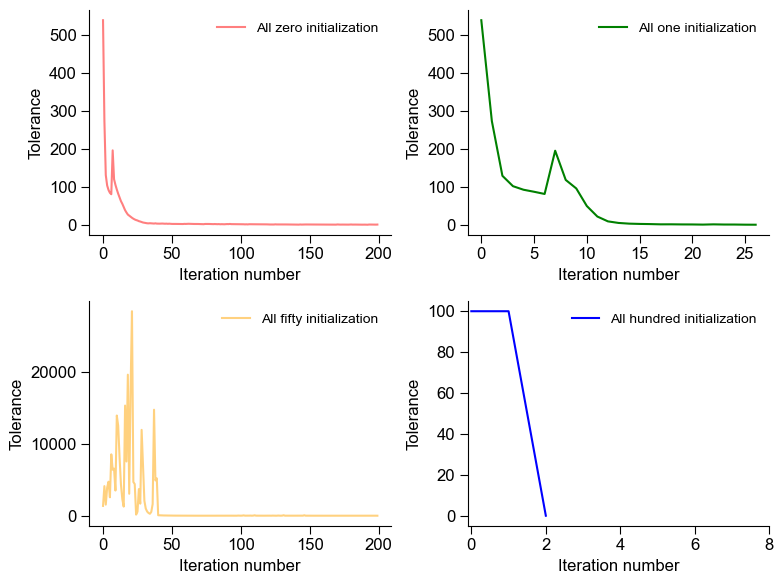

In [128]:
fig, ax= plt.subplots(figsize=(8,6),ncols=2,nrows=2)
ax[0][0].plot(np.arange(0,200,1),dge2.tol_, c='red',label='All zero initialization',alpha=0.5)
ax[0][1].plot(np.arange(0,27,1),dge3.tol_, c='green',label='All one initialization')
ax[1][0].plot(np.arange(0,200,1),dge4.tol_, c='orange',label='All fifty initialization',alpha=0.5)
ax[1][1].plot(np.arange(0,3,1),dge5.tol_, c='blue', label='All hundred initialization')
ax[1,1].set_xticks(range(0,10,2))
for i in range(2):
    for j in range(2):
        ax[i][j].legend(frameon=False,fontsize = 'small',loc='upper right')
        ax[i][j].set_xlabel('Iteration number')
        ax[i][j].set_ylabel('Tolerance')
sns.despine(fig=fig)
fig.tight_layout(w_pad=0.8)
#fig.savefig(myDir+"tolerance and iteration number.svg", bbox_inches='tight', pad_inches=0, dpi=600)

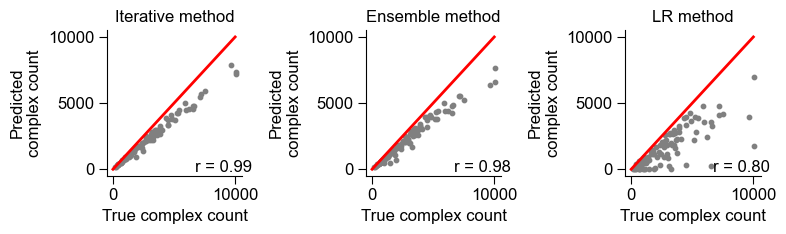

In [8]:
fig, ax = plt.subplots(ncols=3, figsize=(8,2.5))
ax[0].scatter(sim1.complex_count.loc["2:2",:], dge2.complex_count.loc["2:2",:],
              c='grey', s=10)
ax[0].plot([0,10000],[0,10000], c='red', lw=2)
pearsonr = stats.pearsonr(sim1.complex_count.loc["2:2",:], dge2.complex_count.loc["2:2",:])
ax[0].text(0.65,0.03, f"r = {pearsonr[0]:.2f}", transform=ax[0].transAxes)
ax[0].set_title("Iterative method")
ax[1].scatter(sim1.complex_count.loc["2:2",:], dge.complex_count.loc["2:2",:],
              c='grey', s=10)
ax[1].plot([0,10000],[0,10000], c='red', lw=2)
pearsonr = stats.pearsonr(sim1.complex_count.loc["2:2",:], dge.complex_count.loc["2:2",:])
ax[1].text(0.65,0.03, f"r = {pearsonr[0]:.2f}", transform=ax[1].transAxes)
ax[1].set_title("Ensemble method")
ax[2].scatter(sim1.complex_count.loc["2:2",:], dge.complex_count2.loc["2:2",:],
              c='grey', s=10)
ax[2].plot([0,10000],[0,10000], c='red', lw=2)
pearsonr = stats.pearsonr(sim1.complex_count.loc["2:2",:], dge.complex_count2.loc["2:2",:])
ax[2].text(0.65,0.03, f"r = {pearsonr[0]:.2f}", transform=ax[2].transAxes)

ax[2].set_title("LR method")
for i in range(3):
    ax[i].set_xlabel("True complex count")
    ax[i].set_ylabel("Predicted\ncomplex count")
fig.tight_layout(w_pad=0.8)
sns.despine(fig=fig)

In [5]:
# Pearson correlation
pearsonr = pd.DataFrame(np.nan, index=dge.complex_count.index, columns=["p_Iterative","p_Ensemble","p_LR"])
for i in pearsonr.index:
    pearsonr.at[i,"p_Ensemble"] = stats.pearsonr(sim1.complex_count.loc[i,:], dge.complex_count.loc[i,:])[0]
    pearsonr.at[i,"p_Iterative"] = stats.pearsonr(sim1.complex_count.loc[i,:], dge2.complex_count.loc[i,:])[0]
    pearsonr.at[i,"p_LR"] = stats.pearsonr(sim1.complex_count.loc[i,:], dge.complex_count2.loc[i,:])[0]
    
# Convert to square data frame
pearsonr.loc[:,"probeA"] = [s.split(':')[0] for s in pearsonr.index]
pearsonr.loc[:,"probeB"] = [s.split(':')[1] for s in pearsonr.index]
pearsonr_iterative = pearsonr.pivot(index='probeA', columns='probeB', values='p_Iterative')
pearsonr_ensemble = pearsonr.pivot(index='probeA', columns='probeB', values='p_Ensemble')
pearsonr_lr = pearsonr.pivot(index='probeA', columns='probeB', values='p_LR')

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


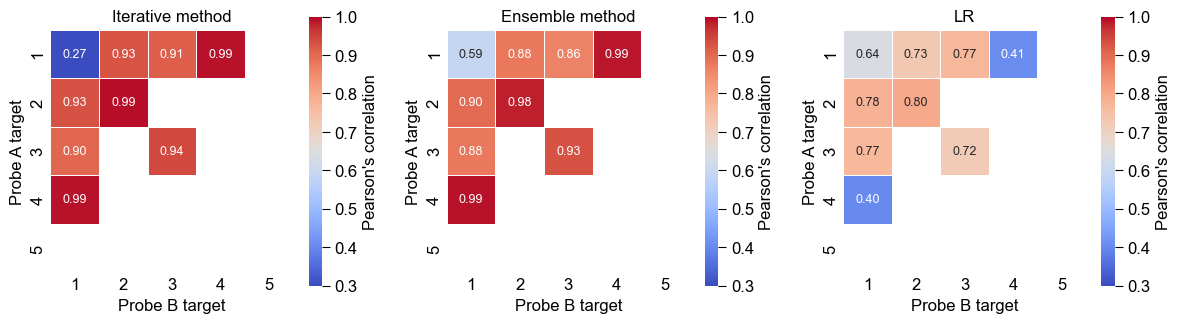

In [65]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3.5))

sns.heatmap(pearsonr_iterative, ax=ax[0],   
            linewidths=0.5,
            square=True, vmax=1, vmin=0.3, cmap='coolwarm',
            annot=True, annot_kws={'fontsize':9},fmt='.2f',
            cbar_kws={'label':"Pearson's correlation",'shrink':0.9})
ax[0].set_title("Iterative method")
sns.heatmap(pearsonr_ensemble, ax=ax[1],   
            linewidths=0.5,
            square=True, vmax=1, vmin=0.3, cmap='coolwarm',
            annot=True, annot_kws={'fontsize':9},fmt='.2f',
            cbar_kws={'label':"Pearson's correlation",'shrink':0.9})

ax[1].set_title("Ensemble method")
sns.heatmap(pearsonr_lr, ax=ax[2],   
            linewidths=0.5,
            square=True, vmax=1, vmin=0.3, cmap='coolwarm',
            annot=True, annot_kws={'fontsize':9},fmt='.2f',
            cbar_kws={'label':"Pearson's correlation",'shrink':0.9})
ax[2].set_title("LR")

for i in ax:
    i.set_xlabel("Probe B target")
    i.set_ylabel("Probe A target")
    i.tick_params(axis='both', length=0)
fig.tight_layout(w_pad=1.5)
#fig.savefig(myDir+"high signal & low noise_pearson correlation_heatmap.svg", bbox_inches='tight', pad_inches=0, dpi=600)

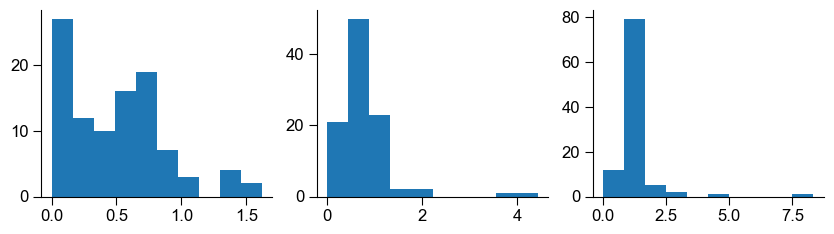

In [8]:
Iter_fraction = dge2.complex_count/sim1.complex_count
Ensem_fraction = dge.complex_count/sim1.complex_count
LR_fraction = dge.complex_count2/sim1.complex_count

fig, ax = plt.subplots(ncols=3, figsize=(8.5,2.5))
ax[0].hist(Iter_fraction.loc["1:3",:])
ax[1].hist(Ensem_fraction.loc["1:3",:])
ax[2].hist(LR_fraction.loc["1:3",:])

fig.tight_layout(w_pad=0.8)
sns.despine(fig=fig)

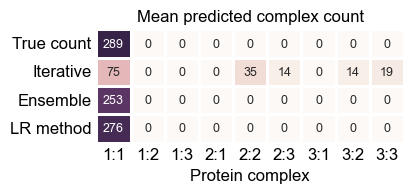

In [107]:
fig, ax = plt.subplots(figsize=(4.3,2.1))
temp = pd.DataFrame({'true':my_sim.complex_count.mean(axis=1),
                     '1':dge2.complex_count.mean(axis=1),
                     '2':dge.complex_count.mean(axis=1),
                     '3':dge.complex_count2.mean(axis=1)})
sns.heatmap(temp.T, linewidths=1, ax=ax, annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=300, cbar=False, fmt='.0f',
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True))
ax.set_xticks(np.arange(9)+0.5)
ax.set_xticklabels(temp.index, rotation=0)
ax.set_yticks(np.arange(4)+0.5)
ax.set_yticklabels(["True count","Iterative","Ensemble","LR method"], rotation=0)
ax.tick_params(axis='both', length=0)
ax.set_xlabel("Protein complex")
ax.set_title("Mean predicted complex count")
fig.tight_layout()
fig.savefig(myDir+"new.svg", bbox_inches='tight', pad_inches=0, dpi=600)

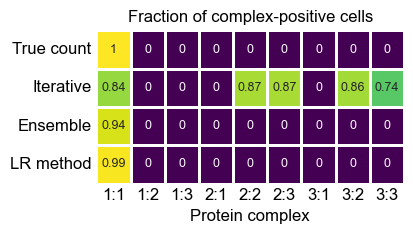

In [108]:
temp = pd.DataFrame({'true':(my_sim.complex_count>0).sum(axis=1),
                     '1':(dge2.complex_count>0).sum(axis=1),
                     '2':(dge.complex_count>0).sum(axis=1),
                     '3':(dge.complex_count2>0).sum(axis=1)})

fig, ax = plt.subplots(figsize=(4.3,2.5))
sns.heatmap(temp.T/dge.shape[1],
            linewidths=1, ax=ax, annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=1, cbar=False, fmt='.2g',
            cmap='viridis')
ax.set_xticks(np.arange(9)+0.5)
ax.set_xticklabels(temp.index, rotation=0)
ax.set_yticks(np.arange(4)+0.5)
ax.set_yticklabels(["True count","Iterative","Ensemble","LR method"], rotation=0)
ax.tick_params(axis='both', length=0)
ax.set_xlabel("Protein complex")
ax.set_title("Fraction of complex-positive cells")
fig.tight_layout()
fig.savefig(myDir+"heatmap_prediction_fraction_comparison.svg", bbox_inches='tight', pad_inches=0, dpi=600)

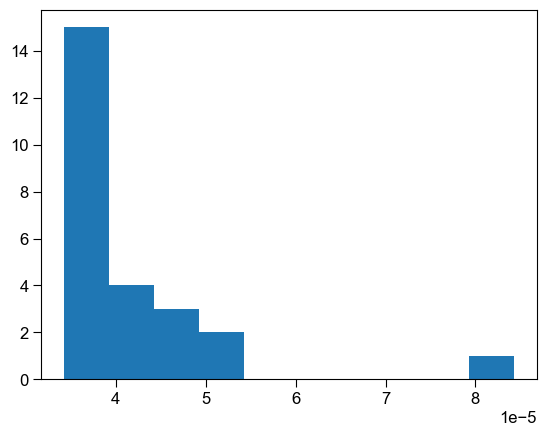

In [10]:
plt.hist(my_wls.loc[:,"slope"])
plt.show()

In [10]:
dge3.predictComplex(non_proximal_count=sim1.non_proximal_count,nIter = 200, sym_weight = 1,df_guess=dge.complex_count2.copy())
dge.predictComplex(df_guess=dge.complex_count2.copy(),test='wilcoxon')
dge2.predictComplex(non_proximal_count=sim1.non_proximal_count,nIter = 200, sym_weight = 1, df_guess=dge.complex_count2.copy())

predictComplex done: Loop number 6, tolerance 1.00
predictComplex done: Loop number 200, tolerance 2.16
predictComplex done: Loop number 2, tolerance 0.00


In [3]:
my_avg_T = pd.DataFrame({'mean':(dge2.complex_count).mean(axis=1)})
my_avg_T['probeA'] = [s.split(':')[0] for s in my_avg_T.index]
my_avg_T['probeB'] = [s.split(':')[1] for s in my_avg_T.index]
my_avg_T = my_avg_T.pivot(index='probeA', columns='probeB', values='mean')

my_avg_T2 = pd.DataFrame({'mean':(dge.complex_count).mean(axis=1)})
my_avg_T2['probeA'] = [s.split(':')[0] for s in my_avg_T2.index]
my_avg_T2['probeB'] = [s.split(':')[1] for s in my_avg_T2.index]
my_avg_T2 = my_avg_T2.pivot(index='probeA', columns='probeB', values='mean')

# Plot heatmap of average predicted complex count in T cells
my_wls = dge.lr_params2
my_avg_T3 = pd.DataFrame({'mean':(dge.complex_count2).mean(axis=1)})
# Filter
my_avg_T3.loc[(my_wls["pval_intercept"].isna()),:] = 0
my_avg_T3['probeA'] = [s.split(':')[0] for s in my_avg_T3.index]
my_avg_T3['probeB'] = [s.split(':')[1] for s in my_avg_T3.index]
my_avg_T3 = my_avg_T3.pivot(index='probeA', columns='probeB', values='mean')

my_avg_T4 = pd.DataFrame({'mean':(sim1.complex_count).mean(axis=1)})
my_avg_T4['probeA'] = [s.split(':')[0] for s in my_avg_T4.index]
my_avg_T4['probeB'] = [s.split(':')[1] for s in my_avg_T4.index]
my_avg_T4 = my_avg_T4.pivot(index='probeA', columns='probeB', values='mean')

In [144]:
#Mean accuary calculation 
mean_accuracy = pd.DataFrame({"True":(sim1.complex_count).mean(axis=1),
                             "Iterative":(dge5.complex_count).mean(axis=1),
                             "Ensemble":(dge.complex_count).mean(axis=1),
                             "LR":(dge.complex_count2).mean(axis=1)})
score = pd.concat([mean_accuracy, pearsonr], axis=1)
score = score[score['True']>0]
score['iter_deviation'] = abs(score['Iterative'] - score['True'])/score['True']
score['ensem_deviation'] = abs(score['Ensemble'] - score['True'])/score['True']
score['lr_deviation'] = abs(score['LR'] - score['True'])/score['True']

iterative_score = 0.5*score['p_Iterative'].sum(axis=0) - 0.4*score['iter_deviation'].sum(axis=0) - 0.1*(temp['Iterative']/dge.shape[1]).sum(axis=0)
ensemble_score = 0.5*score['p_Ensemble'].sum(axis=0) - 0.4*score['ensem_deviation'].sum(axis=0) - 0.1*(temp['Ensemble']/dge.shape[1]).sum(axis=0)
lr_score = 0.5*score['p_LR'].sum(axis=0) - 0.4*score['lr_deviation'].sum(axis=0) - 0.1*(temp['LR']/dge.shape[1]).sum(axis=0)


In [7]:
PS.calculatePredScore(my_sim.complex_count,dge.complex_count2)

3.6156279402883267

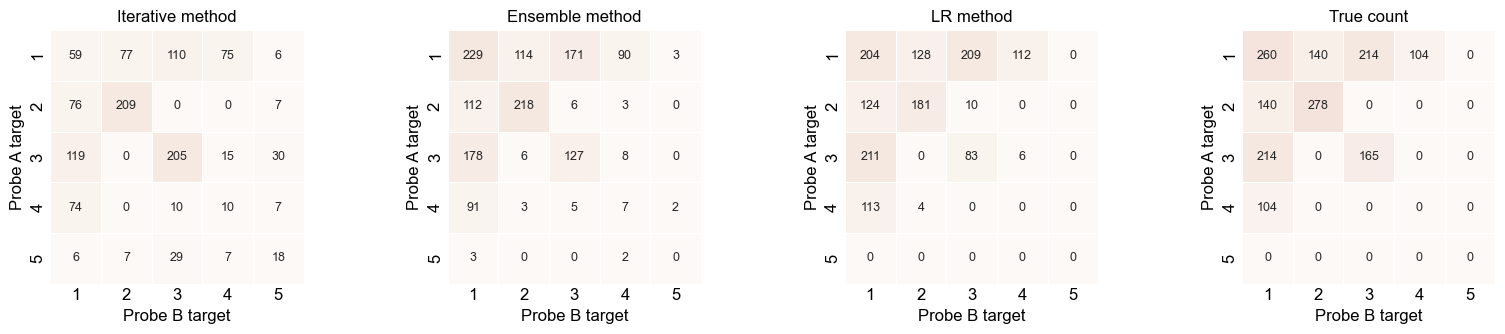

In [4]:
my_ticklabels = [0,200,400,r"$\geq 600$"]
fig, ax = plt.subplots(ncols=4, figsize=(16,3.5))
sns.heatmap(my_avg_T, ax=ax[0],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=3000, cbar=False, fmt='.0f'
            )
ax[0].set_title("Iterative method")
sns.heatmap(my_avg_T2, ax=ax[1],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=3000, cbar=False, fmt='.0f'
            )
ax[1].set_title("Ensemble method")
sns.heatmap(my_avg_T3, ax=ax[2],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=3000, cbar=False, fmt='.0f'
            )
ax[2].set_title("LR method")
sns.heatmap(my_avg_T4, ax=ax[3],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=3000, cbar=False, fmt='.0f'
            )
ax[3].set_title("True count")

for i in ax:
    i.set_xlabel("Probe B target")
    i.set_ylabel("Probe A target")
    i.tick_params(axis='both', length=0)
fig.tight_layout(w_pad=1.5)
#fig.savefig(myDir+"low signal & high noise_heatmap.svg", bbox_inches='tight', pad_inches=0, dpi=600)

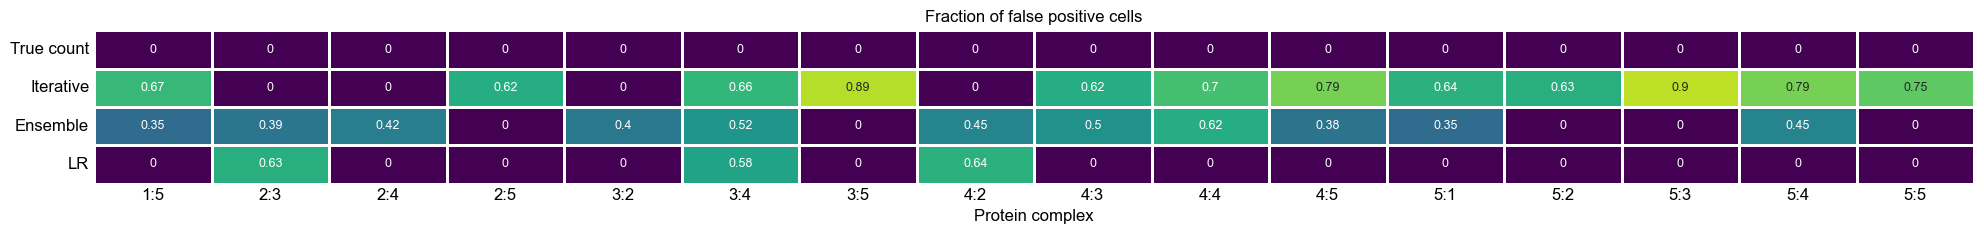

In [110]:
fig, ax = plt.subplots(figsize=(20,2.5))
temp = pd.DataFrame({'true':(sim1.complex_count>0).sum(axis=1),
                     'Iterative':(dge2.complex_count>0).sum(axis=1),
                     'Ensemble':(dge.complex_count>0).sum(axis=1),
                     'LR':(dge.complex_count2>0).sum(axis=1)})

temp = temp[temp['true']==0]
sns.heatmap(temp.T/dge.shape[1],
            linewidths=1, ax=ax, annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=1, cbar=False, fmt='.2g',
            cmap='viridis')

ax.set_xticklabels(temp.index, rotation=0)

ax.set_yticklabels(["True count","Iterative","Ensemble","LR"], rotation=0)
ax.tick_params(axis='both', length=0)
ax.tick_params(axis='both', length=0)
ax.set_xlabel("Protein complex")
ax.set_title("Fraction of false positive cells")
fig.tight_layout()

In [6]:
#high signal and low noise 
num_complex = np.zeros((5,5))
num_complex[0,0] = 3000
num_complex[0,1] = 1500
num_complex[1,0] = 1500
num_complex[0,1] = 1500
num_complex[0,2] = 2000
num_complex[2,0] = 2000
num_complex[0,3] = 1000
num_complex[3,0] = 1000
num_complex[1,1] = 3000
num_complex[2,2] = 2000



probeA = np.array([30,30,20,10,10])
probeB = np.array([30,30,20,10,10])

sim1 = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                      seed_num=2019, protein_variance=True,  ligate_all=False)
sim1.simulate(num_complex, probeA, probeB)
dge = PC.plaObject(sim1.pla_count)
dge2 = PC.plaObject(sim1.pla_count)



dge.predictComplex(method='lr', suffix='2', non_proximal_count=sim1.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-04-03 20:25:48     Start simulation
2023-04-03 20:26:31     Processed     10 cells
2023-04-03 20:27:05     Processed     20 cells
2023-04-03 20:27:47     Processed     30 cells
2023-04-03 20:28:04     Processed     40 cells
2023-04-03 20:28:24     Processed     50 cells
2023-04-03 20:28:54     Processed     60 cells
2023-04-03 20:29:11     Processed     70 cells
2023-04-03 20:29:34     Processed     80 cells
2023-04-03 20:30:07     Processed     90 cells
2023-04-03 20:31:04     Processed    100 cells


/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/Python/simulation_reproduce figures/ProxseqClasses.py:701: RuntimeWarning: divide by zero encountered in double_scalars
  t_intercept = (results.params[0] - intercept_cutoff)/results.bse[0]
/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/Python/simulation_reproduce figures/ProxseqClasses.py:703: RuntimeWarning: invalid value encountered in double_scalars
  t_slope = (results.params[1] - slope_cutoff)/results.bse[1]


predictComplex done: Loop number 200, tolerance 2.87
predictComplex done: Loop number 200, tolerance 5.16


In [51]:
PS.calculatePredScore(my_sim.complex_count,dge2.complex_count)

-0.44981231849463155

In [66]:
#similar signal and nosie with multiple protein complexes 
num_complex = np.zeros((3,3))
num_complex[0,0] = 1000
num_complex[0,1] = 500
num_complex[1,0] = 500
num_complex[2,0] = 500
num_complex[0,2] = 500
num_complex[1,1] = 1000
num_complex[1,2] = 500
num_complex[2,1] = 500
num_complex[2,2] = 1000
probeAB = np.array([500,500,500])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-08 17:02:08     Start simulation
2023-03-08 17:02:13     Processed     10 cells
2023-03-08 17:02:17     Processed     20 cells
2023-03-08 17:02:20     Processed     30 cells
2023-03-08 17:02:24     Processed     40 cells
2023-03-08 17:02:29     Processed     50 cells
2023-03-08 17:02:32     Processed     60 cells
2023-03-08 17:02:36     Processed     70 cells
2023-03-08 17:02:40     Processed     80 cells
2023-03-08 17:02:44     Processed     90 cells
2023-03-08 17:02:49     Processed    100 cells
predictComplex done: Loop number 39, tolerance 1.00
predictComplex done: Loop number 22, tolerance 0.92


In [71]:
#high signal and low noise with multiple protein complexes 
num_complex = np.zeros((3,3))
num_complex[0,0] = 1000
num_complex[0,1] = 500
num_complex[1,0] = 500
num_complex[2,0] = 500
num_complex[0,2] = 500
num_complex[1,1] = 1000
num_complex[1,2] = 500
num_complex[2,1] = 500
num_complex[2,2] = 1000
probeAB = np.array([50,50,50])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-08 17:09:02     Start simulation
2023-03-08 17:09:05     Processed     10 cells
2023-03-08 17:09:07     Processed     20 cells
2023-03-08 17:09:10     Processed     30 cells
2023-03-08 17:09:13     Processed     40 cells
2023-03-08 17:09:15     Processed     50 cells
2023-03-08 17:09:18     Processed     60 cells
2023-03-08 17:09:21     Processed     70 cells
2023-03-08 17:09:24     Processed     80 cells
2023-03-08 17:09:26     Processed     90 cells
2023-03-08 17:09:29     Processed    100 cells
predictComplex done: Loop number 200, tolerance 22.52
predictComplex done: Loop number 25, tolerance 0.90


In [74]:
#high noise and low signal with multiple protein complexes 
num_complex = np.zeros((3,3))
num_complex[0,0] = 100
num_complex[0,1] = 50
num_complex[1,0] = 50
num_complex[2,0] = 50
num_complex[0,2] = 50
num_complex[1,1] = 100
num_complex[1,2] = 50
num_complex[2,1] = 50
num_complex[2,2] = 100
probeAB = np.array([1000,1000,1000])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-08 18:08:03     Start simulation
2023-03-08 18:08:05     Processed     10 cells
2023-03-08 18:08:05     Processed     20 cells
2023-03-08 18:08:06     Processed     30 cells
2023-03-08 18:08:07     Processed     40 cells
2023-03-08 18:08:08     Processed     50 cells
2023-03-08 18:08:09     Processed     60 cells
2023-03-08 18:08:10     Processed     70 cells
2023-03-08 18:08:11     Processed     80 cells
2023-03-08 18:08:12     Processed     90 cells
2023-03-08 18:08:12     Processed    100 cells
predictComplex done: Loop number 108, tolerance 0.98
predictComplex done: Loop number 18, tolerance 0.90


In [79]:
#high signal and low noise with only homodimers
num_complex = np.zeros((3,3))
num_complex[0,0] = 3000
num_complex[1,1] = 2000
num_complex[2,2] = 1000
probeAB = np.array([30,20,10])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-08 18:12:42     Start simulation
2023-03-08 18:12:45     Processed     10 cells
2023-03-08 18:12:48     Processed     20 cells
2023-03-08 18:12:51     Processed     30 cells
2023-03-08 18:12:53     Processed     40 cells
2023-03-08 18:12:56     Processed     50 cells
2023-03-08 18:12:59     Processed     60 cells
2023-03-08 18:13:01     Processed     70 cells
2023-03-08 18:13:04     Processed     80 cells
2023-03-08 18:13:07     Processed     90 cells
2023-03-08 18:13:09     Processed    100 cells
predictComplex done: Loop number 200, tolerance 3.46
predictComplex done: Loop number 200, tolerance 21.40


In [83]:
#high noise and low signal with only homodimers
num_complex = np.zeros((3,3))
num_complex[0,0] = 300
num_complex[1,1] = 200
num_complex[2,2] = 100
probeAB = np.array([3000,2000,1000])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-08 20:03:10     Start simulation
2023-03-08 20:03:17     Processed     10 cells
2023-03-08 20:03:20     Processed     20 cells
2023-03-08 20:03:21     Processed     30 cells
2023-03-08 20:03:26     Processed     40 cells
2023-03-08 20:03:29     Processed     50 cells
2023-03-08 20:03:34     Processed     60 cells
2023-03-08 20:03:36     Processed     70 cells
2023-03-08 20:03:39     Processed     80 cells
2023-03-08 20:03:43     Processed     90 cells
2023-03-08 20:03:46     Processed    100 cells
predictComplex done: Loop number 200, tolerance 1.51
predictComplex done: Loop number 173, tolerance 1.00


In [91]:
#high noise and low signal with only heterodimers
num_complex = np.zeros((3,3))
num_complex[0,1] = 300
num_complex[1,0] = 300
num_complex[0,2] = 200
num_complex[2,0] = 200
num_complex[1,2] = 100
num_complex[2,1] = 100
probeAB = np.array([3000,2000,1000])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-08 20:12:46     Start simulation
2023-03-08 20:12:53     Processed     10 cells
2023-03-08 20:12:56     Processed     20 cells
2023-03-08 20:12:58     Processed     30 cells
2023-03-08 20:13:03     Processed     40 cells
2023-03-08 20:13:07     Processed     50 cells
2023-03-08 20:13:12     Processed     60 cells
2023-03-08 20:13:15     Processed     70 cells
2023-03-08 20:13:18     Processed     80 cells
2023-03-08 20:13:23     Processed     90 cells
2023-03-08 20:13:26     Processed    100 cells
predictComplex done: Loop number 22, tolerance 0.94
predictComplex done: Loop number 30, tolerance 0.99


In [87]:
#high signal and low noise with only heterodimers
num_complex = np.zeros((3,3))
num_complex[0,1] = 3000
num_complex[1,0] = 3000
num_complex[0,2] = 2000
num_complex[2,0] = 2000
num_complex[1,2] = 1000
num_complex[2,1] = 1000
probeAB = np.array([30,20,10])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-08 20:09:29     Start simulation
2023-03-08 20:09:42     Processed     10 cells
2023-03-08 20:09:51     Processed     20 cells
2023-03-08 20:10:07     Processed     30 cells
2023-03-08 20:10:18     Processed     40 cells
2023-03-08 20:10:29     Processed     50 cells
2023-03-08 20:10:41     Processed     60 cells
2023-03-08 20:10:48     Processed     70 cells
2023-03-08 20:11:03     Processed     80 cells
2023-03-08 20:11:12     Processed     90 cells
2023-03-08 20:11:19     Processed    100 cells
predictComplex done: Loop number 43, tolerance 0.99
predictComplex done: Loop number 34, tolerance 0.91


In [95]:
#high signal and low noise with 1 protein forming complexes 
num_complex = np.zeros((3,3))
num_complex[0,0] = 3000
num_complex[0,1] = 2000
num_complex[1,0] = 2000
num_complex[0,2] = 1000
num_complex[2,0] = 1000
probeAB = np.array([30,20,10])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-08 20:14:30     Start simulation
2023-03-08 20:14:36     Processed     10 cells
2023-03-08 20:14:40     Processed     20 cells
2023-03-08 20:14:46     Processed     30 cells
2023-03-08 20:14:51     Processed     40 cells
2023-03-08 20:14:57     Processed     50 cells
2023-03-08 20:15:01     Processed     60 cells
2023-03-08 20:15:06     Processed     70 cells
2023-03-08 20:15:15     Processed     80 cells
2023-03-08 20:15:20     Processed     90 cells
2023-03-08 20:15:24     Processed    100 cells
predictComplex done: Loop number 200, tolerance 1.44
predictComplex done: Loop number 45, tolerance 0.96


In [99]:
#high noise and low signal with 1 protein forming complexes 
num_complex = np.zeros((3,3))
num_complex[0,0] = 300
num_complex[0,1] = 200
num_complex[1,0] = 200
num_complex[0,2] = 100
num_complex[2,0] = 100
probeAB = np.array([3000,2000,1000])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-09 10:34:53     Start simulation
2023-03-09 10:35:01     Processed     10 cells
2023-03-09 10:35:04     Processed     20 cells
2023-03-09 10:35:06     Processed     30 cells
2023-03-09 10:35:10     Processed     40 cells
2023-03-09 10:35:14     Processed     50 cells
2023-03-09 10:35:19     Processed     60 cells
2023-03-09 10:35:21     Processed     70 cells
2023-03-09 10:35:24     Processed     80 cells
2023-03-09 10:35:28     Processed     90 cells
2023-03-09 10:35:31     Processed    100 cells
predictComplex done: Loop number 22, tolerance 0.99
predictComplex done: Loop number 123, tolerance 0.87


In [106]:
#high noise and low signal with 1 protein forming homodimers
num_complex = np.zeros((3,3))
num_complex[0,0] = 300
probeAB = np.array([3000,2000,1000])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-09 10:39:33     Start simulation
2023-03-09 10:39:42     Processed     10 cells
2023-03-09 10:39:44     Processed     20 cells
2023-03-09 10:39:45     Processed     30 cells
2023-03-09 10:39:49     Processed     40 cells
2023-03-09 10:39:52     Processed     50 cells
2023-03-09 10:39:56     Processed     60 cells
2023-03-09 10:39:58     Processed     70 cells
2023-03-09 10:40:01     Processed     80 cells
2023-03-09 10:40:04     Processed     90 cells
2023-03-09 10:40:06     Processed    100 cells
predictComplex done: Loop number 133, tolerance 1.00
predictComplex done: Loop number 58, tolerance 0.83


In [43]:
#high signal and low noise with 1 protein forming heterodimers
num_complex = np.zeros((3,3))
num_complex[0,1] = 2000
num_complex[1,0] = 2000
num_complex[0,2] = 1000
num_complex[2,0] = 1000
probeAB = np.array([30,20,10])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-02-26 15:08:03     Start simulation
2023-02-26 15:08:06     Processed     10 cells
2023-02-26 15:08:09     Processed     20 cells
2023-02-26 15:08:13     Processed     30 cells
2023-02-26 15:08:17     Processed     40 cells
2023-02-26 15:08:22     Processed     50 cells
2023-02-26 15:08:26     Processed     60 cells
2023-02-26 15:08:28     Processed     70 cells
2023-02-26 15:08:32     Processed     80 cells
2023-02-26 15:08:34     Processed     90 cells
2023-02-26 15:08:38     Processed    100 cells
predictComplex done: Loop number 59, tolerance 0.99
predictComplex done: Loop number 13, tolerance 0.99


In [103]:
#high signal and low noise with 1 protein forming homodimers
num_complex = np.zeros((3,3))
num_complex[0,0] = 3000
probeAB = np.array([30,200,100])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-03-09 10:37:20     Start simulation
2023-03-09 10:37:21     Processed     10 cells
2023-03-09 10:37:22     Processed     20 cells
2023-03-09 10:37:22     Processed     30 cells
2023-03-09 10:37:23     Processed     40 cells
2023-03-09 10:37:24     Processed     50 cells
2023-03-09 10:37:25     Processed     60 cells
2023-03-09 10:37:29     Processed     70 cells
2023-03-09 10:37:30     Processed     80 cells
2023-03-09 10:37:31     Processed     90 cells
2023-03-09 10:37:32     Processed    100 cells
predictComplex done: Loop number 200, tolerance 7.11
predictComplex done: Loop number 200, tolerance 7.68


In [46]:
#high noise and low signal with 1 protein forming heterodimers
num_complex = np.zeros((3,3))
num_complex[0,1] = 200
num_complex[1,0] = 200
num_complex[0,2] = 100
num_complex[2,0] = 100
probeAB = np.array([3000,2000,1000])

# Simulation
my_sim = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                        seed_num=2019, protein_variance=True, ligate_all=False)
my_sim.simulate(num_complex, probeAB, probeAB)

dge = PC.plaObject(my_sim.pla_count)
dge2 = PC.plaObject(my_sim.pla_count)
dge.predictComplex(method='lr', suffix='2', non_proximal_count=my_sim.non_proximal_count)
dge.predictComplex(df_guess=dge.complex_count2.copy())
dge2.predictComplex()

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-02-26 15:11:21     Start simulation
2023-02-26 15:11:30     Processed     10 cells
2023-02-26 15:11:33     Processed     20 cells
2023-02-26 15:11:34     Processed     30 cells
2023-02-26 15:11:38     Processed     40 cells
2023-02-26 15:11:42     Processed     50 cells
2023-02-26 15:11:46     Processed     60 cells
2023-02-26 15:11:48     Processed     70 cells
2023-02-26 15:11:52     Processed     80 cells
2023-02-26 15:11:56     Processed     90 cells
2023-02-26 15:11:58     Processed    100 cells
predictComplex done: Loop number 56, tolerance 0.99
predictComplex done: Loop number 18, tolerance 0.95


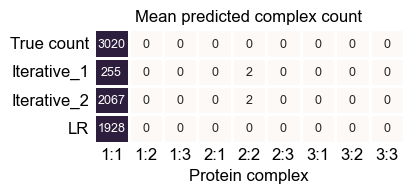

In [44]:
fig, ax = plt.subplots(figsize=(4.3,2.1))
temp = pd.DataFrame({'true':my_sim.complex_count.mean(axis=1),
                     '1':dge2.complex_count.mean(axis=1),
                     '2':dge.complex_count.mean(axis=1),
                     '3':dge.complex_count2.mean(axis=1)})
sns.heatmap(temp.T, linewidths=1, ax=ax, annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=200, cbar=False, fmt='.0f',
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True))
ax.set_xticks(np.arange(9)+0.5)
ax.set_xticklabels(temp.index, rotation=0)
ax.set_yticks(np.arange(4)+0.5)
ax.set_yticklabels(["True count","Iterative_1","Iterative_2","LR"], rotation=0)
ax.tick_params(axis='both', length=0)
ax.set_xlabel("Protein complex")
ax.set_title("Mean predicted complex count")
fig.tight_layout()
#fig.savefig(myDir+"high noise and low signal with multiple protein complexes.svg", bbox_inches='tight', pad_inches=0)

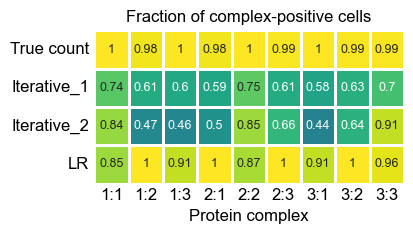

In [58]:
temp = pd.DataFrame({'true':(my_sim.complex_count>0).sum(axis=1),
                     '1':(dge2.complex_count>0).sum(axis=1),
                     '2':(dge.complex_count>0).sum(axis=1),
                     '3':(dge.complex_count2>0).sum(axis=1)})

fig, ax = plt.subplots(figsize=(4.3,2.5))
sns.heatmap(temp.T/dge.shape[1],
            linewidths=1, ax=ax, annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=1, cbar=False, fmt='.2g',
            cmap='viridis')
ax.set_xticks(np.arange(9)+0.5)
ax.set_xticklabels(temp.index, rotation=0)
ax.set_yticks(np.arange(4)+0.5)
ax.set_yticklabels(["True count","Iterative_1","Iterative_2","LR"], rotation=0)
ax.tick_params(axis='both', length=0)
ax.set_xlabel("Protein complex")
ax.set_title("Fraction of complex-positive cells")
fig.tight_layout()
fig.savefig(myDir+"heatmap_prediction_fraction_comparison.svg", bbox_inches='tight', pad_inches=0)

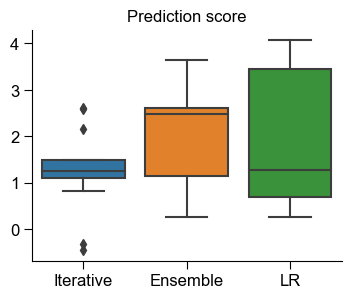

In [9]:
score_iter = [2.15,1.49,1.28,1.13,1.29,1.09,1.24,2.61,2.59,1.23,0.83,-0.32,-0.45]
score_ensem = [2.54,3.06,3.57,2.51,3.65,1.05,1.14,2.48,2.60,1.76,2.08,0.27,0.41]
score_lr = [0.82,3.45,4.07,3.55,3.62,0.55,1.18,0.70,2.54,1.27,2.08,0.27,0.45]

df = pd.DataFrame({'Iterative':score_iter,
                   'Ensemble':score_ensem,
                   'LR':score_lr})
fig,ax = plt.subplots(figsize=(4,3))
sns.boxplot(data=df,ax=ax)
ax.set_title('Prediction score')
sns.despine(fig=fig)